In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import missingno as ms
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE

/Users/supanatj/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/supanatj/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/supanatj/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/supanatj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/supanatj/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/supanatj/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py"

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_test.shape

(367, 12)

In [5]:
df_traintest = df_train.append(df_test,sort=False)
df_traintest.shape

(981, 13)

In [6]:
df_traintest.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


### EDA

In [7]:
df_traintest.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df_traintest.shape

(981, 13)

In [9]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


check null values


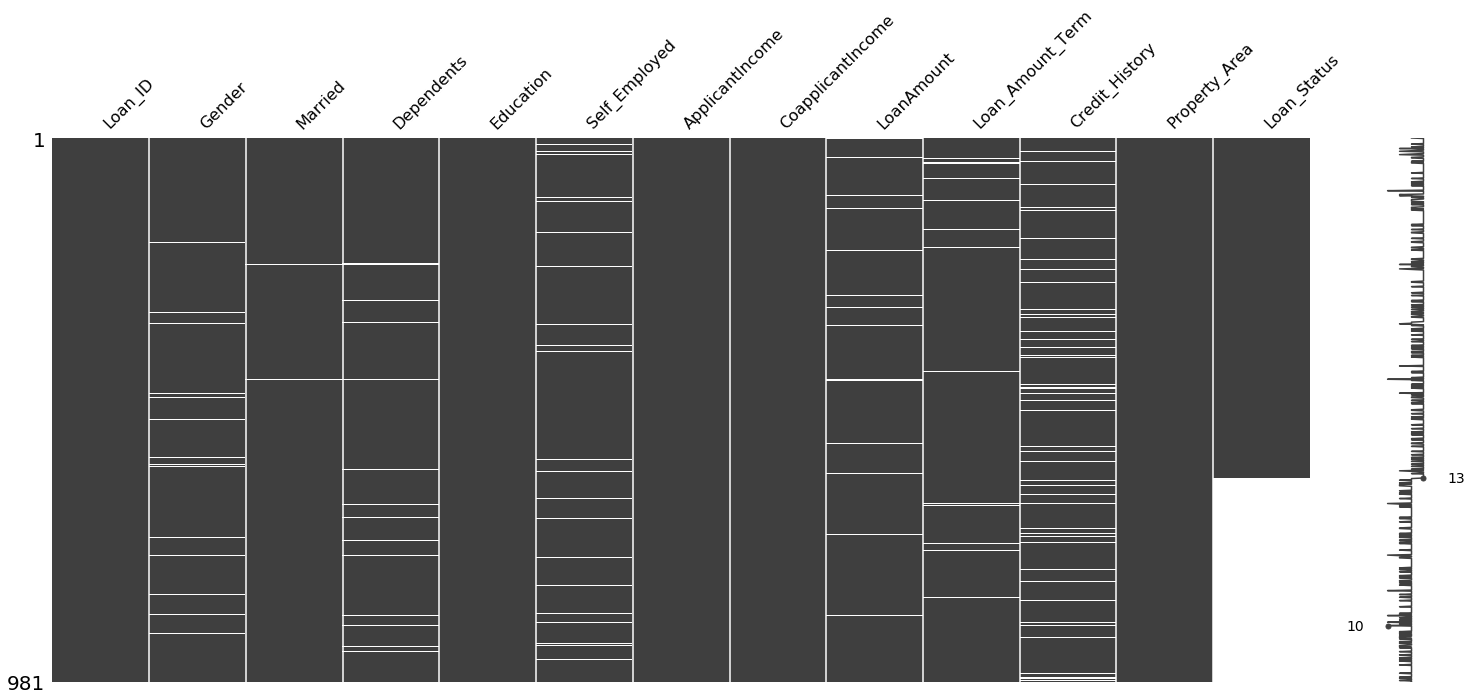

In [10]:
print("check null values")
ms.matrix(df_traintest)

In [62]:
pandas_profiling.ProfileReport(df_train)

Number of variables,13
Number of observations,614
Total Missing (%),1.9%
Total size in memory,62.4 KiB
Average record size in memory,104.1 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [64]:
pandas_profiling.ProfileReport(df_test)

Number of variables,12
Number of observations,367
Total Missing (%),1.9%
Total size in memory,34.5 KiB
Average record size in memory,96.2 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [13]:
#df_train.sample(5)

fill null with 0 and replace married status with 0,1

In [14]:
df_traintest['Married'].isnull().sum()

3

In [15]:
#df_train['Married'].isnull().sum()
df_traintest['Married'].fillna(0,inplace=True)
df_traintest['Married'].isnull().sum()

0

In [16]:
df_traintest['Married'].replace(['Yes','No'],[1,0],inplace=True)
df_traintest['Married'] = df_traintest['Married'].astype(int)

df_traintest.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
38,LP001211,Male,0,0,Graduate,Yes,5833,0.0,116.0,360.0,1.0,Urban,NaN
249,LP001825,Male,1,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
127,LP001449,Male,0,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
92,LP001486,Male,1,1,Graduate,No,4364,2500.0,185.0,360.0,1.0,Semiurban,NaN
317,LP002036,Male,1,0,Graduate,No,2058,2134.0,88.0,360.0,NaN,Urban,Y


Dependents

In [17]:
df_traintest['Dependents'].isnull().sum()

25

In [18]:
df_traintest['Dependents'].fillna(0,inplace=True)
df_traintest['Dependents'].isnull().sum()

0

In [19]:
df_traintest['Dependents'].replace(['3+'],[3],inplace=True)
df_traintest['Dependents'] = df_traintest['Dependents'].astype(int)

df_traintest.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
310,LP002746,Male,0,0,Graduate,No,5314,0.0,147.0,360.0,1.0,Urban,NaN
353,LP002920,Male,1,0,Graduate,No,5119,3769.0,120.0,360.0,1.0,Rural,NaN
613,LP002990,Female,0,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
288,LP002592,Male,0,0,Graduate,No,4983,0.0,141.0,360.0,1.0,Urban,NaN
225,LP001751,Male,1,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural,N


Education

In [20]:
#pd.get_dummies(df_train["Education"])

df_traintest['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)
df_traintest['Education'] = df_traintest['Education'].astype(int)
df_traintest.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
280,LP002554,Male,0,0,1,No,2166,2057.0,122.0,360.0,1.0,Semiurban,NaN
12,LP001083,Male,0,3,1,No,4166,0.0,40.0,180.0,NaN,Urban,NaN
229,LP001761,Male,0,0,1,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y
33,LP001187,Male,1,0,1,No,2783,2708.0,158.0,360.0,1.0,Urban,NaN
247,LP002360,Male,1,0,1,No,10000,0.0,NaN,360.0,1.0,Urban,NaN


Self_Employed

In [21]:
df_traintest['Self_Employed'].isnull().sum()

55

In [22]:
df_traintest['Self_Employed'].fillna(0,inplace=True)
df_traintest['Self_Employed'].isnull().sum()

0

In [23]:
df_traintest['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)
df_traintest['Self_Employed'] = df_traintest['Self_Employed'].astype(int)

df_traintest.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
452,LP002448,Male,1,0,1,0,3948,1733.0,149.0,360.0,0.0,Rural,N
327,LP002805,Male,1,2,1,0,5041,700.0,150.0,360.0,1.0,Urban,NaN
201,LP001677,Male,0,2,1,0,4923,0.0,166.0,360.0,0.0,Semiurban,Y
57,LP001197,Male,1,0,1,0,3366,2200.0,135.0,360.0,1.0,Rural,N
267,LP002445,Female,0,1,0,0,3854,3575.0,117.0,360.0,1.0,Rural,NaN


ApplicantIncome and CoapplicantIncome

In [24]:
df_traintest['ApplicantIncome'].isnull().sum()

0

In [25]:
df_traintest['CoapplicantIncome'].isnull().sum()

0

LoanAmout

In [26]:
df_traintest['LoanAmount'].isnull().sum()

27

In [27]:
df_traintest['Loan_Amount_Term'].isnull().sum()

20

In [28]:
df_traintest[['LoanAmount']].head(10)

,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
5,267.0
6,95.0
7,158.0
8,168.0
9,349.0


In [29]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df_traintest[['LoanAmount']])
df_traintest['LoanAmount'] = imp_median.transform(df_traintest[['LoanAmount']])

df_traintest[['LoanAmount']].head(10)

,LoanAmount
0,126.0
1,128.0
2,66.0
3,120.0
4,141.0
5,267.0
6,95.0
7,158.0
8,168.0
9,349.0


In [30]:
df_traintest.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,0,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,1,3,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [31]:
#df_train[df_train['Loan_Amount_Term'] == 360]


In [32]:
#print(df_train[df_train["Loan_Amount_Term"].isnull()])
print(df_traintest[df_traintest["Loan_Amount_Term"].isnull()]["Loan_Amount_Term"])


19    NaN
36    NaN
44    NaN
45    NaN
73    NaN
112   NaN
165   NaN
197   NaN
223   NaN
232   NaN
335   NaN
367   NaN
421   NaN
423   NaN
45    NaN
48    NaN
117   NaN
129   NaN
184   NaN
214   NaN
Name: Loan_Amount_Term, dtype: float64


In [33]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df_traintest[['Loan_Amount_Term']])
df_traintest['Loan_Amount_Term'] = imp_median.transform(df_traintest[['Loan_Amount_Term']])

df_traintest[['Loan_Amount_Term']].head(10)

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
5,360.0
6,360.0
7,360.0
8,360.0
9,360.0


In [34]:
df_traintest['Loan_Amount_Term'].isnull().sum()

0

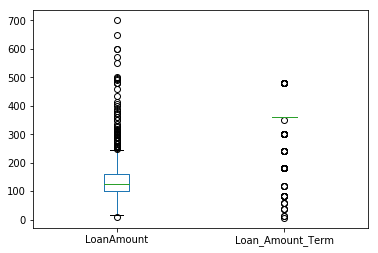

In [35]:
df_traintest[['LoanAmount','Loan_Amount_Term']].plot.box()

Credit_History

In [36]:
df_traintest['Credit_History'].isnull().sum()

79

In [37]:
df_traintest['Credit_History'].fillna(0,inplace=True)
df_traintest['Credit_History'].isnull().sum()
df_traintest.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002974,Male,1,0,1,0,3232,1950.0,108.0,360.0,1.0,Rural,Y
362,LP002971,Male,1,3,0,1,4009,1777.0,113.0,360.0,1.0,Urban,NaN
97,LP001333,Male,1,0,1,0,1977,997.0,50.0,360.0,1.0,Semiurban,Y
95,LP001499,Female,1,3,1,0,6260,0.0,110.0,360.0,1.0,Semiurban,NaN
188,LP002057,Male,1,0,0,0,13083,0.0,126.0,360.0,1.0,Rural,NaN


In [38]:
df_traintest['Credit_History'].isnull().sum()

0

One-Hot

In [39]:
#pd.get_dummies(df_train["Property_Area"])

df_with_dummies = pd.get_dummies( df_traintest, columns = ["Property_Area"] )
df_traintest = df_with_dummies
df_traintest.sample(5)
 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
477,LP002530,NaN,1,2,1,0,2873,1872.0,132.0,360.0,0.0,N,0,1,0
93,LP001490,Male,1,2,0,0,4766,1646.0,100.0,360.0,1.0,NaN,0,1,0
471,LP002517,Male,1,1,0,0,2653,1500.0,113.0,180.0,0.0,N,1,0,0
4,LP001051,Male,0,0,0,0,3276,0.0,78.0,360.0,1.0,NaN,0,0,1
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Y,0,0,1


In [40]:
#df_traintest['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
#df_traintest['Loan_Status'] = df_traintest['Loan_Status'].astype(int)

#df_traintest.sample(5)

In [41]:
df_traintest['Credit_History'].isnull().sum()

0

In [42]:
df_traintest.dtypes

Loan_ID                     object
Gender                      object
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [43]:
#colors = np.where(df_traintest["Loan_Status"]==1,'b','-')


#df_train.plot.scatter(x='ApplicantIncome',y='LoanAmount',
#                      c='Loan_Status',colormap='viridis')

#ax2 = df_traintest.plot.scatter(x='ApplicantIncome',y='LoanAmount',c='Loan_Status',figsize=(5, 5))

### Train test split

In [44]:
df_traintest.shape

(981, 15)

In [45]:
df_test.shape

(367, 12)

In [46]:
#df_traintest[0:614]
df_traintest[614:981].tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
362,LP002971,Male,1,3,0,1,4009,1777.0,113.0,360.0,1.0,NaN,0,0,1
363,LP002975,Male,1,0,1,0,4158,709.0,115.0,360.0,1.0,NaN,0,0,1
364,LP002980,Male,0,0,1,0,3250,1993.0,126.0,360.0,0.0,NaN,0,1,0
365,LP002986,Male,1,0,1,0,5000,2393.0,158.0,360.0,1.0,NaN,1,0,0
366,LP002989,Male,0,0,1,1,9200,0.0,98.0,180.0,1.0,NaN,1,0,0


In [47]:
X_train = df_traintest[0:614]
X_train.drop(['Loan_Status'], axis=1, inplace=True)
X_train.drop(['Gender'], axis=1, inplace=True)
X_train.drop(['Loan_ID'], axis=1, inplace=True)
X_train.sample(5)

/Users/supanatj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
560,1,2,0,0,3675,242.0,108.0,360.0,1.0,0,1,0
461,1,3,1,0,7740,0.0,128.0,180.0,1.0,0,0,1
341,0,0,1,0,2378,0.0,46.0,360.0,1.0,1,0,0
249,1,0,1,0,1809,1868.0,90.0,360.0,1.0,0,0,1
197,0,0,0,0,1907,2365.0,120.0,360.0,1.0,0,0,1


In [48]:
X_train.shape

(614, 12)

In [49]:
X_test = df_traintest[614:981]
X_test.drop(['Loan_Status'], axis=1, inplace=True)
X_test.drop(['Gender'], axis=1, inplace=True)
X_test.drop(['Loan_ID'], axis=1, inplace=True)
X_test.sample(5)

/Users/supanatj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
32,0,0,1,0,3268,1683.0,152.0,360.0,1.0,0,1,0
354,1,3,0,0,5316,187.0,158.0,180.0,0.0,0,1,0
73,1,0,1,1,3900,2094.0,232.0,360.0,1.0,1,0,0
260,1,3,0,0,2792,2619.0,171.0,360.0,1.0,0,1,0
128,0,0,1,0,3073,0.0,70.0,180.0,1.0,0,0,1


In [50]:
y_train = df_traintest[0:614][['Loan_Status']]
y_train['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
y_train['Loan_Status'] = y_train['Loan_Status'].astype(int)
y_train.head(5)

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [51]:
X_train.shape

(614, 12)

In [52]:
y_train.isnull().sum()

Loan_Status    0
dtype: int64

In [53]:
y_train = y_train['Loan_Status']

In [54]:
X_train.isnull().sum()

Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [55]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [56]:
#pandas_profiling.ProfileReport(pd.DataFrame(y_res))

In [57]:
#X_train = X_res
#y_train = y_res

### Model

In [58]:
def export_result(pred,file_name):
    X_output = df_traintest[614:981][["Loan_ID"]]
    X_output['Loan_Status']=y_pred_test
    X_output['Loan_Status'].replace([1,0],['Y','N'],inplace=True)
    X_output.to_csv(file_name,index=False)

Logistic Regression

In [59]:
clf_1 = LogisticRegression(solver='newton-cg', random_state = 42)
val_acc = cross_val_score(clf_1, X_train, y_train, cv = 10, scoring='f1')
print(f'val acc: {val_acc.mean():.3f}')
clf_1.fit(X_train, y_train)
y_pred_test = clf_1.predict(X_test)
export_result(y_pred_test,'clf_1_sm.csv')

/Users/supanatj/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/supanatj/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/supanatj/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/supanatj/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/supanatj/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The l

val acc: 0.841


In [60]:
clf_3 = RandomForestClassifier(n_estimators=10,max_depth=20, random_state=42)
val_acc = cross_val_score(clf_3, X_train, y_train, cv = 10, scoring='accuracy')
print(f'val acc: {val_acc.mean():.3f}')
clf_3.fit(X_train, y_train)
y_pred_test = clf_3.predict(X_test)
export_result(y_pred_test,'clf_3_rf_sm.csv')

val acc: 0.728


In [61]:
importances = list(clf_3.feature_importances_)